In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import patterns_analysis as pa
%load_ext autoreload
%autoreload 2

## How K_ac patterns affects population structure

### Produce dataframe of model dynamics with different patterned matrices

In [2]:
sizes = 4
num = 500
lower, upper = 0.001, 0.004
patterns = ['null', 'ident', 'naive', 'immune', 
            'barbell', 'cycle', 'complete', 'star']
end_time = 200

results = pa.analyze(sizes,
                     num,
                     lower,
                     upper,
                     patterns,
                     end_time)
print(results.shape)
results.to_csv('../Data/pattern_analysis.tsv', sep='\t', index=False)
results.head()

pattern:   0%|          | 0/8 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

(4000, 8)


,growth_rate,has_grown,skew,euclidian,shannon_index,bray_curtis,init,pattern
0,0.014818,1.0,-7.771561e-16,0.016196,0.000000e+00,1.110223e-16,0,null
1,0.017428,1.0,4.690692e-15,0.016846,0.000000e+00,3.330669e-16,1,null
2,0.012934,1.0,2.331468e-15,0.015451,0.000000e+00,1.110223e-16,2,null
3,0.014695,1.0,2.886580e-15,0.016158,0.000000e+00,2.220446e-16,3,null
4,0.010663,1.0,-6.189493e-15,0.013902,2.220446e-16,2.220446e-16,4,null


In [31]:
df = pd.read_csv('../Data/pattern_analysis.tsv', sep='\t',
                 dtype={'pattern': 'string'},
                 keep_default_na=False)
df = df.drop(['bray_curtis', 'skew'], axis=1)
ids = ['init', 'pattern']
df = pd.melt(df,
             id_vars=ids,
             var_name='statistic',
             value_name='value')
df.head()

,init,pattern,statistic,value
0,0,null,growth_rate,0.014818
1,1,null,growth_rate,0.017428
2,2,null,growth_rate,0.012934
3,3,null,growth_rate,0.014695
4,4,null,growth_rate,0.010663


/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


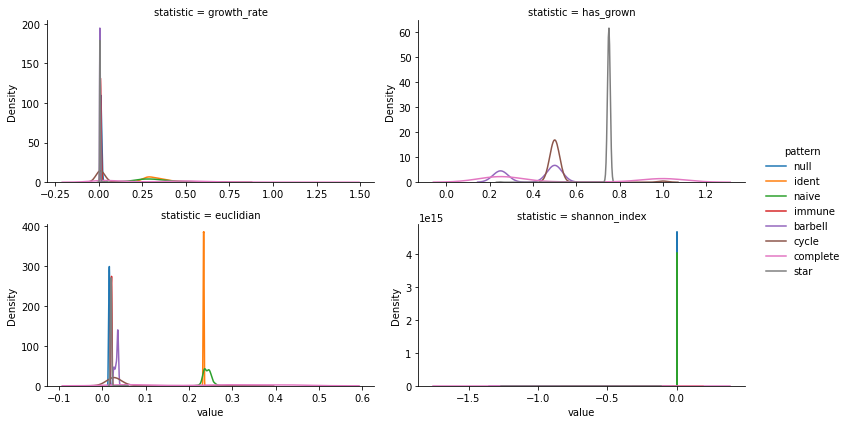

In [34]:
import seaborn as sns
plot = sns.FacetGrid(df, col='statistic', hue='pattern', 
                     col_wrap=2, aspect=16/9, sharex=False, sharey=False)
plot.map_dataframe(sns.kdeplot, x='value')
plot.add_legend()
plot.tight_layout()
plot.fig.savefig('../Documents/figures/pattern_analysis.png')